In [1]:
from MD_sim_Gd_crystal import *

In [ ]:
initial_positions, super_cell_dims = init_Gd_super_cell()
neighbor_list = build_neighbor_list(initial_positions, super_cell_dims, cutoff=12.0)
print("super_cell_dims:", super_cell_dims)
trajectory = run_simulation(initial_positions, super_cell_dims, neighbor_list, temp=300, gamma=0.01, 
                    dt=1, thermalization_steps=1000, production_steps=1000)

super_cell_dims: [29.736      28.61347934 26.97704703]
Starting thermalization phase (1000 steps)...
Thermalization step 0/1000
Thermalization step 100/1000
Thermalization step 200/1000
Thermalization step 300/1000
Thermalization step 400/1000
Thermalization step 500/1000
Thermalization step 600/1000
Thermalization step 700/1000
Thermalization step 800/1000
Thermalization step 900/1000
Thermalization complete. Starting production phase...
Production step 0/1000
Production step 100/1000
Production step 200/1000
Production step 300/1000
Production step 400/1000
Production step 500/1000
Production step 600/1000
Production step 700/1000
Production step 800/1000
Production step 900/1000
Production phase complete.


In [ ]:
trajectory_g1 = run_simulation(initial_positions, super_cell_dims, neighbor_list, temp=300, gamma=0.1, 
                    dt=1, thermalization_steps=1000, production_steps=1000)
trajectory_g001 = run_simulation(initial_positions, super_cell_dims, neighbor_list, temp=300, gamma=0.001, 
                    dt=1, thermalization_steps=1000, production_steps=1000)

Starting thermalization phase (1000 steps)...
Thermalization step 0/1000
Thermalization step 100/1000
Thermalization step 200/1000
Thermalization step 300/1000
Thermalization step 400/1000
Thermalization step 500/1000
Thermalization step 600/1000
Thermalization step 700/1000
Thermalization step 800/1000
Thermalization step 900/1000
Thermalization complete. Starting production phase...
Production step 0/1000
Production step 100/1000
Production step 200/1000
Production step 300/1000
Production step 400/1000
Production step 500/1000
Production step 600/1000
Production step 700/1000
Production step 800/1000
Production step 900/1000
Production phase complete.
Starting thermalization phase (1000 steps)...
Thermalization step 0/1000
Thermalization step 100/1000
Thermalization step 200/1000
Thermalization step 300/1000
Thermalization step 400/1000
Thermalization step 500/1000
Thermalization step 600/1000
Thermalization step 700/1000
Thermalization step 800/1000
Thermalization step 900/1000
The

In [ ]:
corr_g01 = calculate_autocorrelation(trajectory, max_delay=800)
corr_time_g01 = correlation_time(corr_g01, dt=1.0)
corr_g1 = calculate_autocorrelation(trajectory_g1, max_delay=800)
corr_time_g1 = correlation_time(corr_g1, dt=1.0)
corr_g001 = calculate_autocorrelation(trajectory_g001, max_delay=800)
corr_time_g001 = correlation_time(corr_g001, dt=1.0)

Calculating autocorrelation for time delay 0/800
Calculating autocorrelation for time delay 100/800
Calculating autocorrelation for time delay 200/800
Calculating autocorrelation for time delay 300/800
Calculating autocorrelation for time delay 400/800
Calculating autocorrelation for time delay 500/800
Calculating autocorrelation for time delay 600/800
Calculating autocorrelation for time delay 700/800
Calculating autocorrelation for time delay 800/800
Calculating autocorrelation for time delay 0/800
Calculating autocorrelation for time delay 100/800
Calculating autocorrelation for time delay 200/800
Calculating autocorrelation for time delay 300/800
Calculating autocorrelation for time delay 400/800
Calculating autocorrelation for time delay 500/800
Calculating autocorrelation for time delay 600/800
Calculating autocorrelation for time delay 700/800
Calculating autocorrelation for time delay 800/800


In [13]:
print("Correlation time for gamma=0.001:", corr_time_g001)
print("Correlation time for gamma=0.01:", corr_time_g01)
print("Correlation time for gamma=0.1:", corr_time_g1)

Correlation time for gamma=0.001: 90.3521830891442
Correlation time for gamma=0.01: 117.43824047476606
Correlation time for gamma=0.1: 106.09271823719352


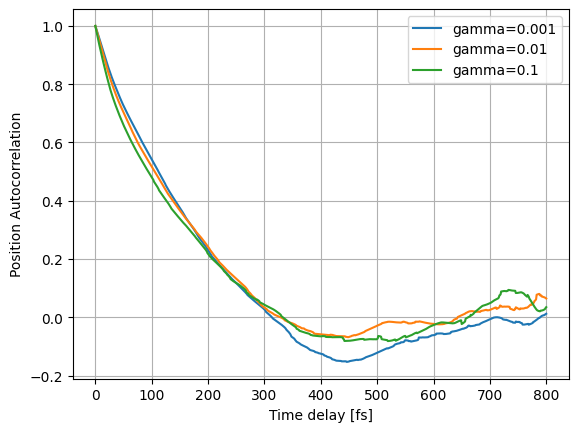

In [19]:
plt.figure()
plt.plot(corr_g001, label='gamma=0.001')
plt.plot(corr_g01, label='gamma=0.01')
plt.plot(corr_g1, label='gamma=0.1')
plt.grid()
plt.xlabel('Time delay [fs]')
plt.ylabel('Position Autocorrelation')
plt.legend()
plt.show()

## mean-squared displacement 

In [ ]:
temperatures = [50, 300, 600, 1000]

msd_values = []
for T in temperatures:
    print(f"Running simulation at T={T} K")
    trajectory = run_simulation(initial_positions, super_cell_dims, neighbor_list, temp=T, gamma=0.01, 
                        dt=1, thermalization_steps=1000, production_steps=2040, sample_rate=int(corr_time_g01))
    
    msd = MSD(trajectory, initial_positions, super_cell_dims)
    print(f"MSD at T={T}: {msd:.3f} Å^2")
    msd_values.append(msd)

Running simulation at T=50 K
Starting thermalization phase (1000 steps)...
Thermalization step 0/1000
Thermalization step 100/1000
Thermalization step 200/1000
Thermalization step 300/1000
Thermalization step 400/1000
Thermalization step 500/1000
Thermalization step 600/1000
Thermalization step 700/1000
Thermalization step 800/1000
Thermalization step 900/1000
Thermalization complete. Starting production phase...
Production step 0/2040
Production step 100/2040
Production step 200/2040
Production step 300/2040
Production step 400/2040
Production step 500/2040
Production step 600/2040
Production step 700/2040
Production step 800/2040
Production step 900/2040
Production step 1000/2040
Production step 1100/2040
Production step 1200/2040
Production step 1300/2040
Production step 1400/2040
Production step 1500/2040
Production step 1600/2040
Production step 1700/2040
Production step 1800/2040
Production step 1900/2040
Production step 2000/2040
Production phase complete.
MSD at T=50: 199.500 Å

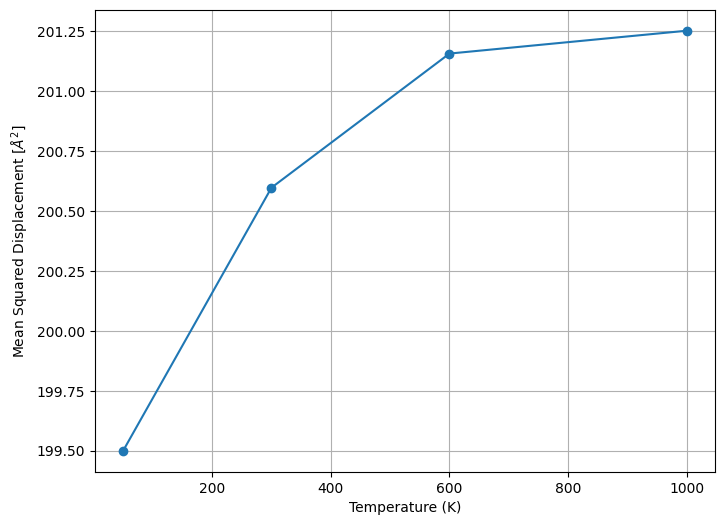

In [ ]:
# MSD as a function of temperature
plt.figure(figsize=(8, 6))
plt.plot(temperatures, msd_values, marker='o', linestyle='-')
plt.xlabel('Temperature (K)')
plt.ylabel(r'Mean Squared Displacement [$Å^2$]')
#plt.title('MSD vs Temperature')
plt.grid(True)
plt.show()